# Feature Scaling

![Data Science Workflow](img/ds-workflow.png)

## What is Feature Scaling?
- **Feature Scaling** transforms values in the similar range for machine learning algorithms to behave optimal.
- **Feature Scaling** can be a problems for **Machine Learing** algorithms on multiple features spanning in different magnitudes.
- **Feature Scaling** can also make it is easier to compare results

### Feature Scaling Techniques
- **Normalization** is a special case of **MinMaxScaler**
    - **Normalization**: Converts values between 0-1
```Python
(values - values.min())/(values.max() - values.min())
```
    - **MinMaxScaler**: Between any values
- **Standardization** (**StandardSclaer** from sklearn)
    - Mean: 0, StdDev: 1
```Python
(values - values.mean())/values.std()
```
    - Less sensitive to outliers

### Machine Learning algorithms
- Some algorithms are more sensitive than others
- **Distance-based** algorithms are most effected by the range of features.
    - Examples include: [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [K-means](https://en.wikipedia.org/wiki/K-means_clustering), [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

### Example
- Weather data `files/weather.csv`
- Predicting if will rain tomorrow
- Goal is to learn about Normalization and Standardization

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("files/weather.csv")

In [3]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3337 non-null   object 
 1   MinTemp        3334 non-null   float64
 2   MaxTemp        3335 non-null   float64
 3   Rainfall       3331 non-null   float64
 4   Evaporation    3286 non-null   float64
 5   Sunshine       3321 non-null   float64
 6   WindGustDir    2301 non-null   object 
 7   WindGustSpeed  2301 non-null   float64
 8   WindDir9am     3281 non-null   object 
 9   WindDir3pm     3304 non-null   object 
 10  WindSpeed9am   3311 non-null   float64
 11  WindSpeed3pm   3312 non-null   float64
 12  Humidity9am    3323 non-null   float64
 13  Humidity3pm    3324 non-null   float64
 14  Pressure9am    3317 non-null   float64
 15  Pressure3pm    3318 non-null   float64
 16  Cloud9am       2771 non-null   float64
 17  Cloud3pm       2776 non-null   float64
 18  Temp9am 

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,2301.000000,3311.000000,3312.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,41.761408,15.070674,19.335447,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,3.319868
std,4.553641,4.494638,9.895172,2.777407,3.810886,13.007523,7.079724,7.482554,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,9.885066
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,31.000000,9.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,50.000000,20.000000,24.000000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.400000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,119.400000


### Simplification
- We will only focus on numeric columns ([`select_dtypes(include='number')`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)
- We will remove all missing values [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- Out goal is to explore Normalization and Standardization

In [6]:
data.select_dtypes(include="number")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,19.5,22.4,15.6,6.2,0.0,NaN,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,6.0
1,19.5,25.6,6.0,3.4,2.7,NaN,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,6.6
2,21.6,24.5,6.6,2.4,0.1,NaN,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,18.8
3,20.2,22.8,18.8,2.2,0.0,NaN,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,77.4
4,19.7,25.7,77.4,NaN,0.0,NaN,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,37.0,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0.0
3333,9.3,19.2,0.0,2.0,9.2,30.0,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0.0
3334,9.4,17.7,0.0,2.4,2.7,24.0,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0.0
3335,10.1,19.3,0.0,1.4,9.3,43.0,17.0,19.0,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0.0


In [7]:
data.isnull().sum()

Date                0
MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
data_clean = data.drop(['RISK_MM'], axis=1)

data_clean = data_clean.dropna()

In [10]:
data_clean

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
990,2010-10-20,12.9,20.3,0.2,3.0,10.9,ENE,37.0,W,E,...,70.0,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,No,No
991,2010-10-21,13.3,21.5,0.0,6.6,11.0,ENE,41.0,W,ENE,...,75.0,58.0,1025.9,1022.4,2.0,5.0,17.6,21.3,No,No
992,2010-10-22,15.3,23.0,0.0,5.6,11.0,NNE,41.0,W,ENE,...,70.0,63.0,1021.4,1017.8,1.0,4.0,19.0,22.2,No,No
996,2010-10-26,12.9,26.7,0.2,3.8,12.1,NE,33.0,W,ENE,...,73.0,56.0,1018.0,1015.0,1.0,5.0,17.8,22.5,No,No
997,2010-10-27,14.8,23.8,0.0,6.8,9.6,SSE,54.0,SSE,SE,...,76.0,69.0,1016.0,1014.7,2.0,7.0,20.2,20.6,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2017-06-21,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,...,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,...,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,...,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,...,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [11]:
len(data_clean)

1690

In [12]:
X = data_clean.select_dtypes(include="number")
y = data_clean['RainTomorrow']

In [13]:
y = np.array([0 if value == 'No' else 1 for value in y])

In [14]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
sum(y)

416

### Box plots
- A great way to understand features
- Recap from Lesson 7
    - Box plots is a great way to visualize descriptive statistics
    - Notice that Q1: 25%, Q2: 50%, Q3: 75%

![Box plots](img/box-plot.png)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
pd.DataFrame(X_train).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,14.980399,23.429734,2.851775,5.414571,7.511612,41.677515,14.980030,19.761095,66.477071,52.886095,1018.535873,1016.135281,4.151627,4.093195,18.089053,21.879216
std,4.553343,4.453831,8.176845,2.839351,3.696782,12.521289,6.600499,7.246114,15.161828,15.902517,7.054959,7.048462,2.721996,2.589659,4.951512,4.219905
min,5.000000,11.700000,0.000000,0.000000,0.000000,19.000000,2.000000,2.000000,19.000000,10.000000,996.700000,994.000000,0.000000,0.000000,6.700000,11.000000
25%,11.200000,20.200000,0.000000,3.400000,5.100000,31.000000,11.000000,15.000000,57.000000,43.000000,1013.975000,1011.500000,1.000000,1.000000,14.200000,18.800000
50%,15.000000,23.200000,0.000000,5.000000,8.500000,41.000000,15.000000,20.000000,67.000000,54.000000,1018.600000,1016.300000,4.000000,4.000000,18.400000,21.600000
75%,18.900000,26.400000,1.000000,7.400000,10.300000,50.000000,19.000000,24.000000,78.000000,63.000000,1023.400000,1021.000000,7.000000,7.000000,21.900000,24.800000
max,27.100000,45.800000,94.400000,15.800000,13.600000,91.000000,44.000000,48.000000,100.000000,95.000000,1039.000000,1036.000000,8.000000,8.000000,36.500000,44.700000


<AxesSubplot: xlabel='Rainfall', ylabel='WindSpeed9am'>

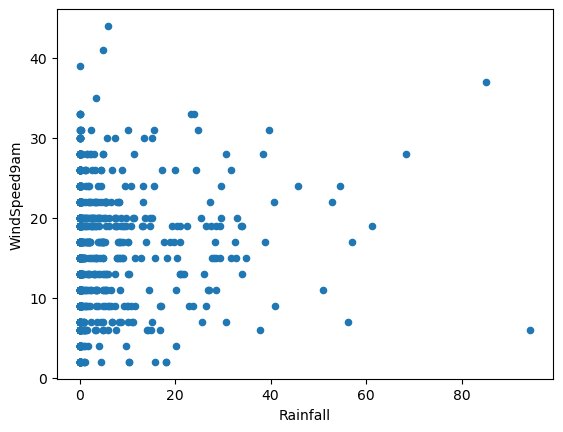

In [18]:
X_train.plot.scatter(x="Rainfall", y="WindSpeed9am")

<AxesSubplot: >

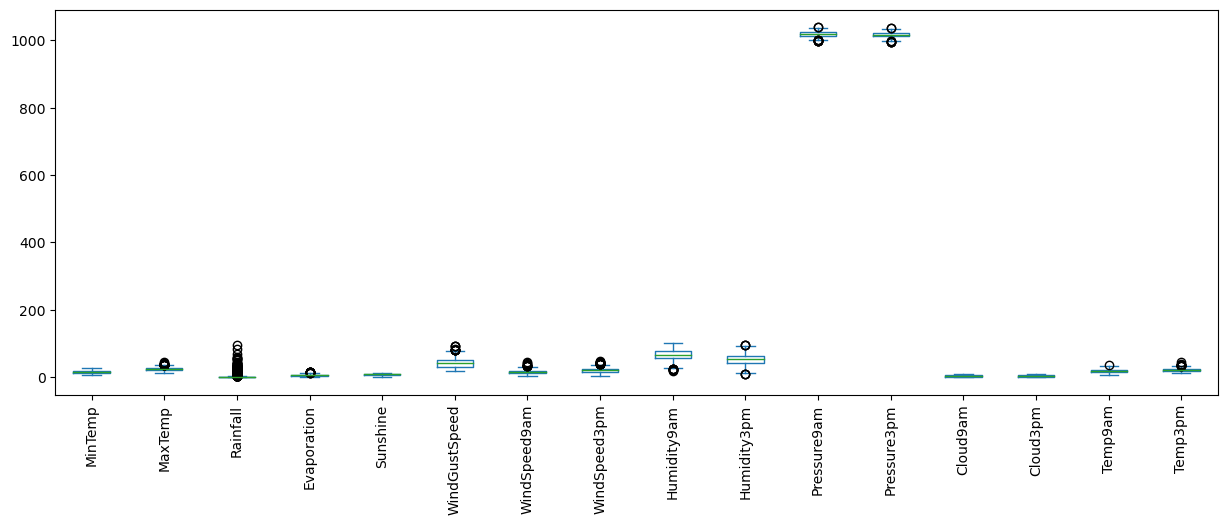

In [23]:
X_train.plot.box(figsize=(15, 5), rot=90)

### Normalization
- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) Transform features by scaling each feature to a given range.
- `MinMaxScaler().fit(X_train)` is used to create a scaler.
    - Notice: We only do it on training data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [26]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,0.451602,0.343980,0.030209,0.342694,0.552324,0.314965,0.309048,0.386111,0.586137,0.504542,0.516214,0.527031,0.518953,0.511649,0.382183,0.322825
std,0.206034,0.130611,0.086619,0.179706,0.271822,0.173907,0.157155,0.157524,0.187183,0.187088,0.166784,0.167821,0.340250,0.323707,0.166158,0.125220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280543,0.249267,0.000000,0.215190,0.375000,0.166667,0.214286,0.282609,0.469136,0.388235,0.408392,0.416667,0.125000,0.125000,0.251678,0.231454
50%,0.452489,0.337243,0.000000,0.316456,0.625000,0.305556,0.309524,0.391304,0.592593,0.517647,0.517730,0.530952,0.500000,0.500000,0.392617,0.314540
75%,0.628959,0.431085,0.010593,0.468354,0.757353,0.430556,0.404762,0.478261,0.728395,0.623529,0.631206,0.642857,0.875000,0.875000,0.510067,0.409496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: xlabel='2', ylabel='6'>

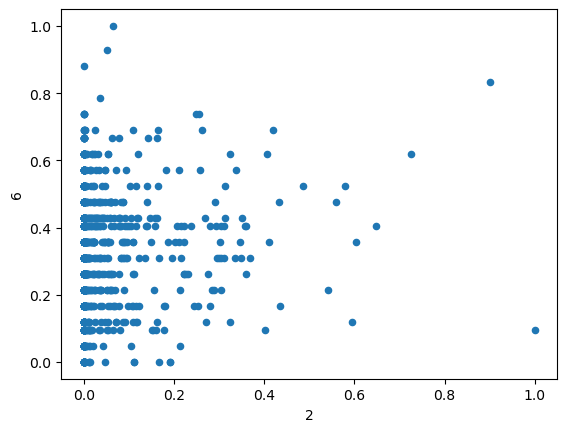

In [28]:
pd.DataFrame(X_train_norm).plot.scatter(x=2, y=6)

<AxesSubplot: >

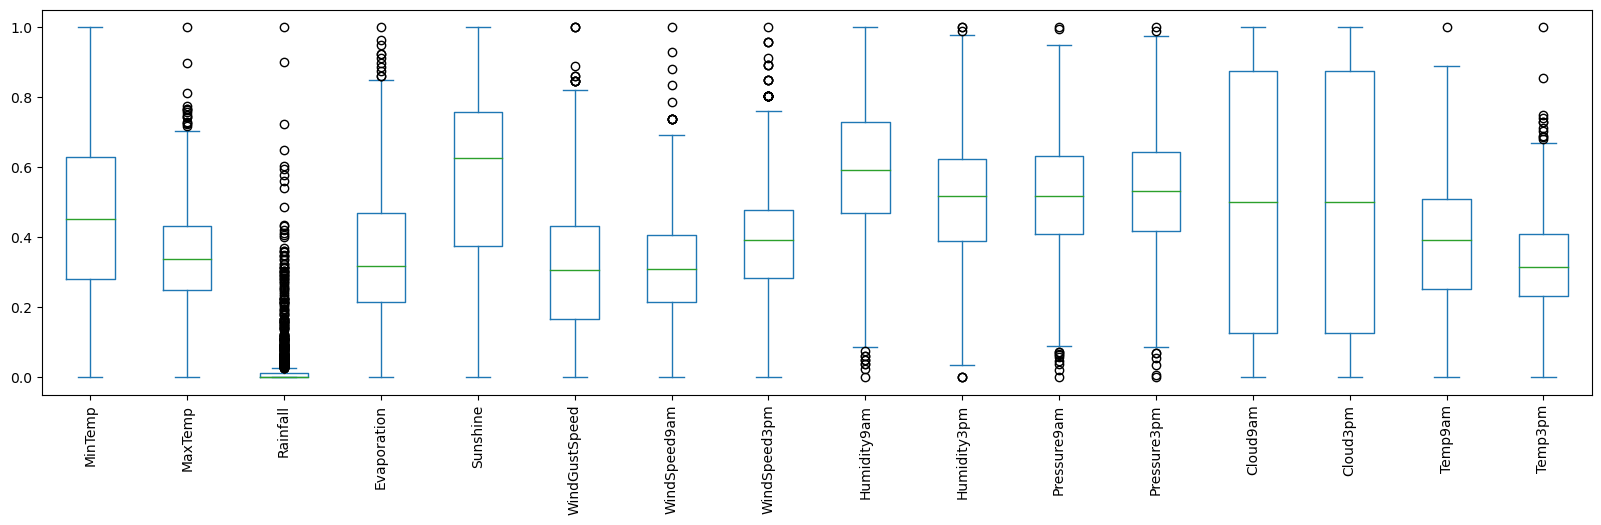

In [33]:
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20, 5), rot=90)

### Standarization
- [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) Standardize features by removing the mean and scaling to unit variance.

In [29]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)

X_test_stand = scale.transform(X_test)

In [35]:
pd.DataFrame(X_train_stand).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03
mean,-1.839423e-17,2.732857e-16,4.861332e-17,2.890521e-17,-8.934339e-17,-3.941620e-17,1.129931e-16,1.859131e-16,4.151840e-16,8.934339e-17,-2.880339e-15,1.732868e-14,-8.146015e-17,-1.865700e-16,-3.271545e-16,4.178117e-16
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-2.192695e+00,-2.634602e+00,-3.488913e-01,-1.907681e+00,-2.032685e+00,-1.811787e+00,-1.967250e+00,-2.452027e+00,-3.132514e+00,-2.697810e+00,-3.096255e+00,-3.141603e+00,-1.525778e+00,-1.581177e+00,-2.300968e+00,-2.579025e+00
25%,-8.305542e-01,-7.254268e-01,-3.488913e-01,-7.097808e-01,-6.525960e-01,-8.530644e-01,-6.032123e-01,-6.572980e-01,-6.252925e-01,-6.218986e-01,-6.467168e-01,-6.578735e-01,-1.158265e+00,-1.194883e+00,-7.857181e-01,-7.299585e-01
50%,4.306253e-03,-5.160023e-02,-3.488913e-01,-1.460631e-01,2.674633e-01,-5.412905e-02,3.026711e-03,3.298233e-02,3.450260e-02,7.007177e-02,9.093029e-03,2.337813e-02,-5.572503e-02,-3.600078e-02,6.282158e-02,-6.619090e-02
75%,8.611368e-01,6.671482e-01,-2.265495e-01,6.995134e-01,7.545535e-01,6.649128e-01,6.092657e-01,5.852066e-01,7.602772e-01,6.362293e-01,6.897173e-01,6.904370e-01,1.046815e+00,1.122882e+00,7.699380e-01,6.924006e-01
max,2.662678e+00,5.024560e+00,1.120018e+01,3.659031e+00,1.647552e+00,3.940548e+00,4.398260e+00,3.898552e+00,2.211826e+00,2.649234e+00,2.901746e+00,2.819348e+00,1.414328e+00,1.509176e+00,3.719624e+00,5.409891e+00


In [36]:
pd.DataFrame(X_train_stand).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00,1352.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.19,-2.63,-0.35,-1.91,-2.03,-1.81,-1.97,-2.45,-3.13,-2.70,-3.10,-3.14,-1.53,-1.58,-2.30,-2.58
25%,-0.83,-0.73,-0.35,-0.71,-0.65,-0.85,-0.60,-0.66,-0.63,-0.62,-0.65,-0.66,-1.16,-1.19,-0.79,-0.73
50%,0.00,-0.05,-0.35,-0.15,0.27,-0.05,0.00,0.03,0.03,0.07,0.01,0.02,-0.06,-0.04,0.06,-0.07
75%,0.86,0.67,-0.23,0.70,0.75,0.66,0.61,0.59,0.76,0.64,0.69,0.69,1.05,1.12,0.77,0.69
max,2.66,5.02,11.20,3.66,1.65,3.94,4.40,3.90,2.21,2.65,2.90,2.82,1.41,1.51,3.72,5.41


<AxesSubplot: xlabel='2', ylabel='6'>

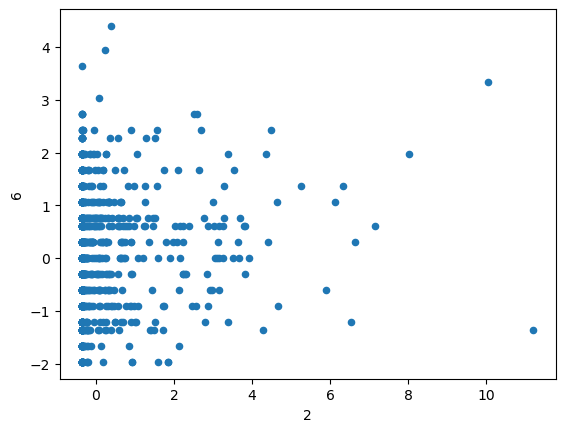

In [37]:
pd.DataFrame(X_train_stand).plot.scatter(x=2, y=6)

<AxesSubplot: >

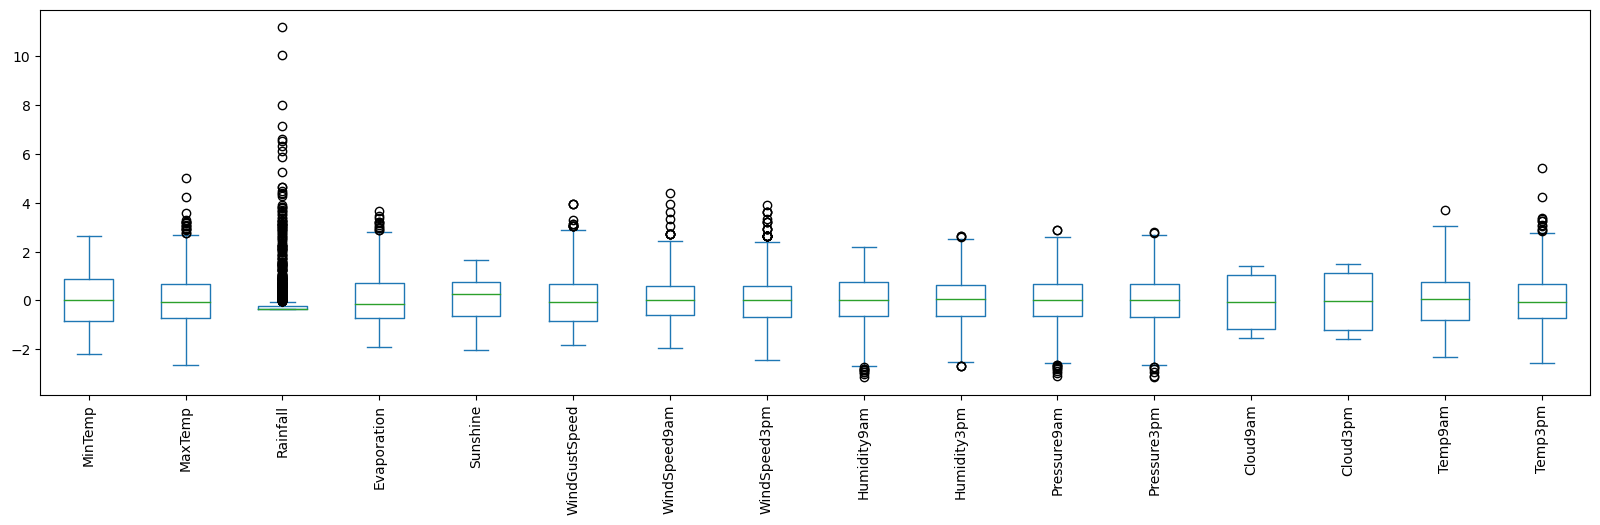

In [38]:
pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20, 5), rot=90)

### Simple Machine Learning Model
- Explore the SVR model
- [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) C-Support Vector Classification.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

score = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for train, test in zip(trainX, testX):
    svc = SVC()
    
    svc.fit(train, y_train)
    y_pred = svc.predict(test)
    
    score.append(accuracy_score(y_test, y_pred))
    
df_svr = pd.DataFrame({'Accuracy Score': score}, index=['Original', 'Normalized', 'Standardized'])
df_svr

,Accuracy Score
Original,0.718935
Normalized,0.807692
Standardized,0.813609
